# Tarea Big Data

### Importar Librerias

In [1]:
suppressWarnings(suppressMessages(library(ff)))
suppressWarnings(suppressMessages(library(ffbase)))
suppressWarnings(suppressMessages(library(biglm)))

## Punto 1. Con el paquete ff en R genere una matriz M de tamaño 1,000 X 10,000

### Cárguela con números aleatorios.

In [2]:
M <- ff(rnorm(1000*10000), dim=c(1000,10000))

### Calcule para 4 columnas tomadas al azar de la matriz M los índices mean(), sd() y el max().

Creamos una función que obtenga una columna aleatoria de la matriz, y nos devuelva las 3 estadísticas requeridas.

In [3]:
set.seed('4')
estadisticas_cols <- function() {
    col1=M[,sample(1:10000, 1)]
    print(c('promedio',mean(col1)))
    print(c('desviación estandar',sd(col1)))
    print(c('máximo',max(col1)))
    cat('\n')
}

In [4]:
# Columna 1
estadisticas_cols()
# Columna 2
estadisticas_cols()
# Columna 3
estadisticas_cols()
# Columna 4
estadisticas_cols()

[1] "promedio"           "0.0255895869682804"
[1] "desviación estandar" "1.00332911995659"   
[1] "máximo"           "2.85117847176173"

[1] "promedio"          "0.055544546193248"
[1] "desviación estandar" "1.02737917323483"   
[1] "máximo"           "3.33005158506677"

[1] "promedio"            "-0.0055332425624537"
[1] "desviación estandar" "0.997779520603923"  
[1] "máximo"           "3.14282652864972"

[1] "promedio"           "0.0414572666188169"
[1] "desviación estandar" "0.994932638602271"  
[1] "máximo"           "3.67668467698921"



### Para 2 columnas al azar c1 y c2 calcule cor( M[,c1],M[,c2] ) y explique la Correlación encontrada.

In [5]:
col1=M[,sample(1:10000, 1)]
col2=M[,sample(1:10000, 1)]
cor(col1,col2)

[1] 0.1137394

### Realice un gráfico tipo plot con 2 columnas tomadas al azar de la matriz M. Explique el Resultado plasmado en la gráfica


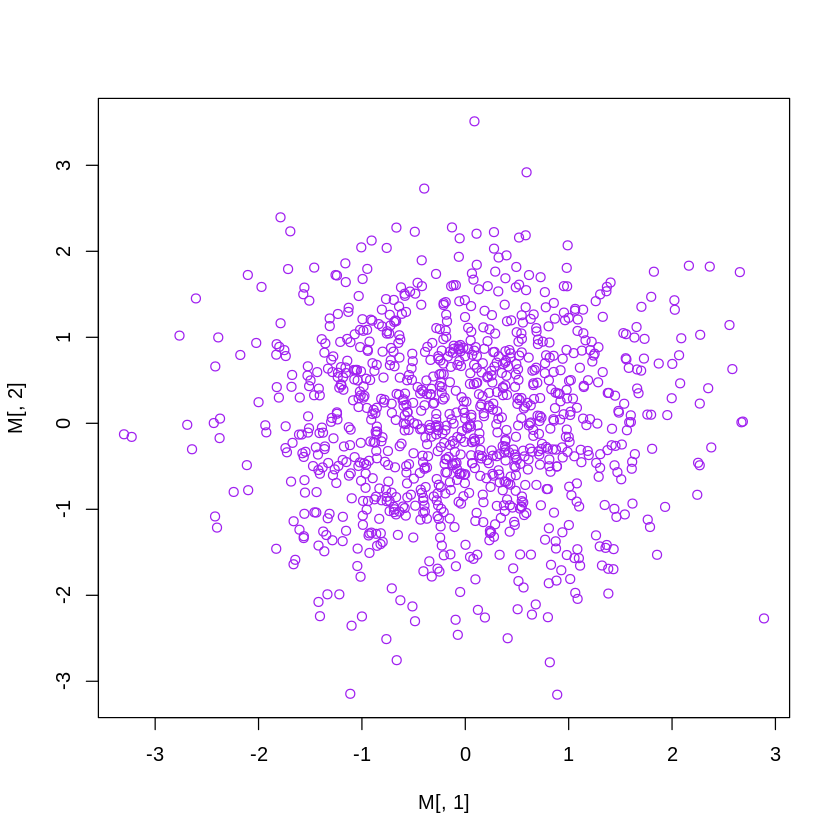

In [6]:
plot(M[,1],M[,2], col = "purple")

#### Como cada elemento de la matriz fue generado con números aleatorios y una distribución normal(0,1), entonces vemos una mayor concentración de puntos justo en el centro como era de esperarse

In [7]:
random_dataframe <- as.data.frame(M[,1:2])
random_dataframe_ff <- as.ffdf(random_dataframe)
class(random_dataframe_ff)
head(random_dataframe_ff)

[1] "ffdf"

,V1,V2
,<dbl>,<dbl>
1,-1.7395601,-0.2882723
2,-0.1846457,1.0045420
3,-0.5049207,0.2380052
4,0.9420756,-0.3980989
5,-1.0325571,0.1891196
6,0.7026760,0.9207987


In [8]:
mymodel <- biglm(V1 ~ V2, data = random_dataframe_ff)
summary(mymodel)

Large data regression model: biglm(V1 ~ V2, data = random_dataframe_ff)
Sample size =  1000 
               Coef    (95%    CI)     SE      p
(Intercept) -0.0538 -0.1163 0.0086 0.0312 0.0848
V2           0.0175 -0.0455 0.0806 0.0315 0.5783

### Aquí estamos tomando la variavle v1 como la dependiente y la v1 como la dependiente y v1 como la independiente

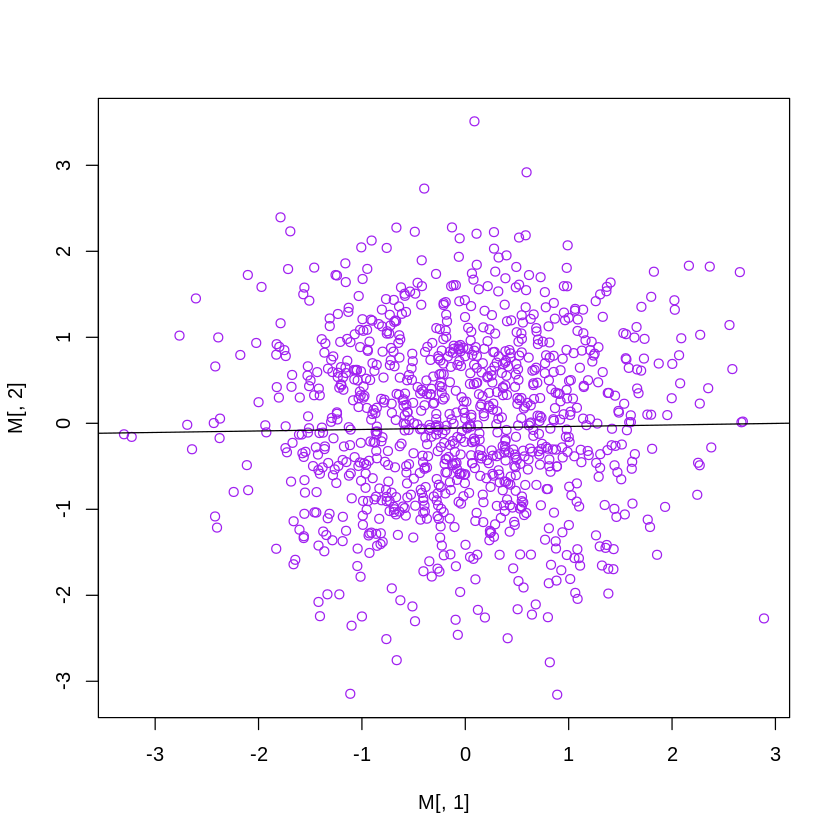

In [9]:
plot(M[,1],M[,2], col = "purple")
abline(mymodel)

### Como era de esperarase, obtenemos una linea horizontal ya que solo tenemos números aleatorios

## Punto 2. El alumno deberá explicar, analizar, implementar, evaluar  y comparar una máquina con aprendizaje no supervisado en paralelo considerando el método de clasificación jerárquica

In [16]:
#install.packages('snow',dependencies=TRUE)
#install.packages('MASS',dependencies=TRUE)
library(MASS)
library(snow)

### Usando lapply y la funcion hclust construya 7 árboles binarios con los métodos ward, single, complete, average, mcquitty, median y centroid, mida el tiempo de ejecución y grafique los 7 árboles en una sola ventana.

In [11]:
#library(snow)
# nstart=Número de muestras aleatorias iniciales Repite 4 veces kmeans con
# nstart=25 con un 'for', o sea código tipo estructurado
resultados <- list()
inercias <- rep(0, 4)
for (k in 1:4) {
    resultados[[k]] <- kmeans(Boston, 4, nstart = 25)
    inercias[k] <- resultados[[k]]$tot.withinss
}
resultados <- resultados[[which.min(inercias)]]
inercias  # Todos dan igual debido a que nstart=25

[1] 1814438 1814438 1814438 1814438